Convolutional Neural Network by Marlo Esperson


Raytheon Advisors: David Detienne and Kerry Courtright

Faculty Advisor: Alex Orange

Team Members: Josh Miraglia, Ryan Procarione, and Erik Graham

Last Update: 11.18.2021

The purpose of this program is to take in labeled generated signal data (bandwidth, center frequency, and signal-to-noise ratio (SNR)) from a Massive MIMO antenna and use it to train and test a convolutional neural network model that will be able to estimate bandwidth, center frequency, and SNR parameters.


Read in all signal data and labels:

In [1]:
#plotting function
%matplotlib notebook

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

spec = 2048

M = 9999 # number of signals

with h5py.File("NNdataset.h5", "r") as f:
    folders = f.keys()
    #print("Folders in base: ", folders)
    
    L = f.get('labels') #Retrieves the "labels" folder.
    S = f.get('signals') #Retrieves "signals" folder.
    
    data = np.array(S.get('rx_signals'))
    dataset = data[0,0,:,:] #Sets the last two dimensions of the 4 dimensional array as the main 
                            #dataset
   

    print(L.keys())
    #print(dataset.shape)
    bandwidth = np.array(L.get('bandwidth'))
    centers = np.array(L.get('center_freq')) #TODO: include frequency in name
    SNR = np.array(L.get('SNR'))


<KeysViewHDF5 ['SNR', 'bandwidth', 'center_freq', 'end_index', 'modulation', 'start_index']>


# Move bandwidth labeled data into an array:

In [3]:

print(bandwidth[0:100])

[0.7169802 0.4155568 0.3947706 0.6541704 0.6336556 0.7549404 0.8662746
 0.8548934 0.46091   0.7086784 0.8848366 0.8546428 0.7185704 0.7625748
 0.2425308 0.281678  0.7711416 0.4612338 0.3638494 0.5555548 0.58814
 0.8111324 0.7489872 0.8264496 0.1484738 0.612306  0.7045478 0.4552022
 0.1729592 0.1306366 0.5145476 0.4611102 0.498249  0.2812358 0.7713936
 0.839939  0.4907508 0.2014836 0.636154  0.2676036 0.7589668 0.6070022
 0.5273686 0.280329  0.519343  0.175659  0.476017  0.8967204 0.3902764
 0.4707174 0.7830136 0.6116014 0.1076468 0.4827694 0.6548622 0.8472638
 0.6199848 0.5137802 0.274419  0.142675  0.1924622 0.6211234 0.2272264
 0.256888  0.414764  0.7227122 0.4202686 0.4950864 0.7095196 0.5912762
 0.570747  0.162056  0.412277  0.351006  0.7471448 0.7581736 0.3451234
 0.749653  0.198722  0.8276172 0.276461  0.5867446 0.8238436 0.3289206
 0.3133708 0.2157584 0.5892964 0.767287  0.6935018 0.3717132 0.879654
 0.6491056 0.166439  0.8063474 0.6776756 0.7659034 0.2546386 0.4486812
 0.156248

<IPython.core.display.Javascript object>


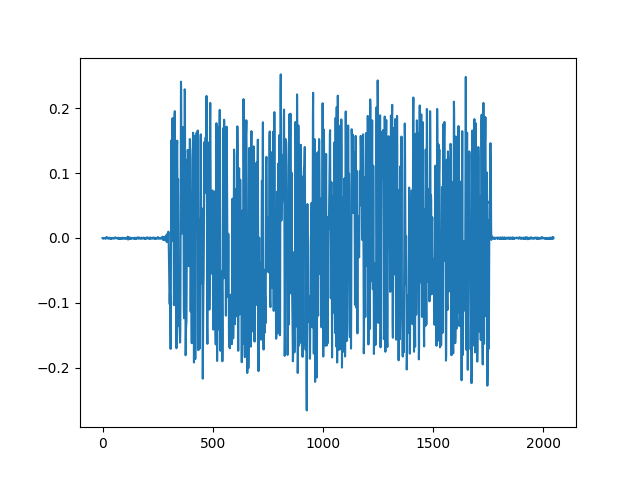

/users/MarloE/ve/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
plt.plot(dataset[1])


In [5]:
dataset_fft = abs(np.fft.fftshift(np.fft.fft(dataset), (1,))) #Pass this into NN.

<IPython.core.display.Javascript object>


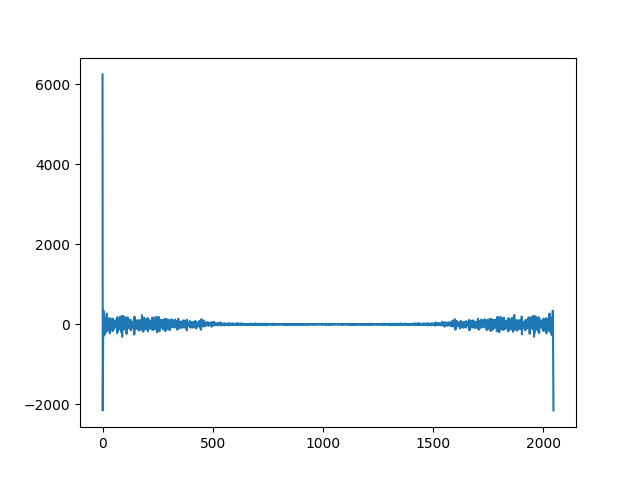

/users/MarloE/ve/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
plt.figure()
#plt.plot((np.fft.fft(dataset))[0])
#plt.show()
plt.plot((np.fft.fft(dataset_fft))[0])
plt.show()

<IPython.core.display.Javascript object>


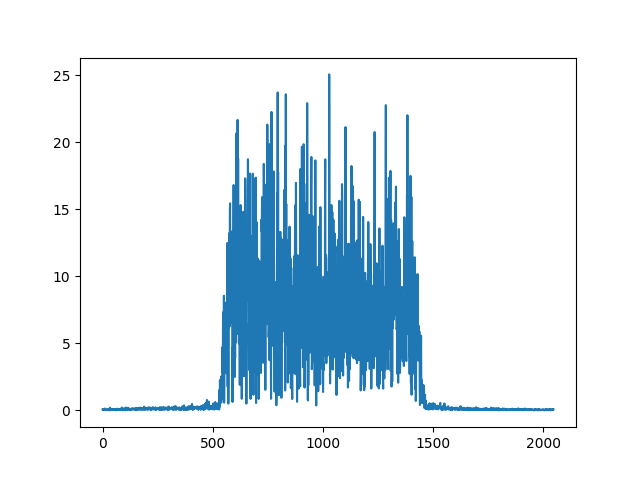

In [7]:
plt.figure()
plt.plot(dataset_fft[1])
plt.show()

Move center frequency labeled data into array:

In [8]:
#[1,2,3]*4

Move SNR labeled data into array:

In [9]:

#signal = dataset[M,:]
#x = np.linspace(0,2048,2048)

#print("test")
#print(dataset.shape)
#print(dataset.size())

    
#     G = f.get('dataset') #Retrieves "generated_data" file.
#     dataset = np.array(G.get('dataset')) #Retrieves contents of "dataset" folder
#     bandwidth = np.array(G.get('bandwidths')) #Retrieves contents of "bandwidths" folder
#     centers = np.array(G.get('center_freq')) #Retrieves "SNR" folder
#     #SNR = np.array(G.get('SNR'))    ????? Cannot upload NNDataset
#     signal = dataset[S,:]
#     x = np.linspace(0,2048,2048)

Signal Pre-Fourier Transform

In [10]:
#plt.plot(x,signal)
#plt.show() 

Signal Post-Fourier Transform

In [11]:
#plt.plot(np.abs(np.fft.fft(signal)))
#plt.show()

Splitting Dataset into Training and Testing Data

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import sys
import h5py
import random
import datetime

#Casts a list indexing from 0 to 9999 for each labeled dataset
#Bandwidth
#print(len(bandwidth))
idx_bw = list(range(len(bandwidth)))
#Center Frequency
#idx_cf = list(range(len(centers)))
#Signal-to-Noise Ratio
#idx_SNR = list(range(len(SNR)))

#TODO: Ask Josh about 2-Dimensional Numpy Array

#Shuffles indices of bandwidth, center freq, and SNR datasets
random.shuffle(idx_bw)
#random.shuffle(idx_cf)
#random.shuffle(idx_SNR)

#Splitting datasets (8000 assigned to training and 2000 to testing)
training_indices_bw, testing_indices_bw = np.split(idx_bw, [int(0.8*len(idx_bw))])

#training_indices_cf, testing_indices_cf = np.split(idx_cf, [int(0.8*len(idx_cf))])
#training_indices_SNR, testing_indices_SNR = np.split(idx_SNR, [int(0.8*len(idx_SNR))])

#initializing testing and training data and label arrays
training_data_bw = []
training_labels_bw = []

testing_data_bw = []
testing_labels_bw = []

# training_data_cf = []
# training_labels_cf = []

# testing_data_cf = []
# testing_labels_cf = []

# training_data_SNR = []
# training_labels_SNR = []

# testing_data_SNR = []
# testing_labels_SNR = []

#fill up training dataset and the associated bandwidths (splitting here)
for idx_bw in training_indices_bw:
    #iterate through all indices and print
    training_data_bw.append(dataset_fft[idx_bw])
    training_labels_bw.append(bandwidth[idx_bw])
    #print(idx)

    #put bandwidth training_data and training_labels into a numpy array.
training_data_bw = np.array(training_data_bw)
training_labels_bw = np.array(training_labels_bw)
   
for idx_bw in testing_indices_bw:
    testing_data_bw.append(dataset_fft[idx_bw])
    testing_labels_bw.append(bandwidth[idx_bw])


testing_data_bw = np.array(testing_data_bw)
testing_labels_bw = np.array(testing_labels_bw)


#fill up training dataset and the associated center frequency (splitting here)
# for idx_cf in training_indices_cf:
#     #iterate through all indices and print
#     training_data_cf.append(dataset[idx_cf])
#     training_labels_cf.append(bandwidth[idx_cf])
#     #print(idx)

#     #put bandwidth training_data and training_labels into a numpy array.
# training_data_cf = np.array(training_data_cf)
# training_labels_cf = np.array(training_labels_cf)
   
# for idx_cf in testing_indices_cf:
#     testing_data_cf.append(dataset[idx_cf])
#     testing_labels_cf.append(centers[idx_cf])


# testing_data_cf = np.array(testing_data_cf)
# testing_labels_cf = np.array(testing_labels_cf)


# for idx_SNR in training_indices_SNR:
#     #iterate through all indices and print
#     training_data_SNR.append(dataset[idx_SNR])
#     training_labels_SNR.append(SNR[idx_SNR])
#     #print(idx)

#     #put bandwidth training_data and training_labels into a numpy array.
# training_data_SNR = np.array(training_data_SNR)
# training_labels_SNR = np.array(training_labels_SNR)
   
# for idx_SNR in testing_indices_SNR:
#     testing_data_SNR.append(dataset[idx_SNR])
#     testing_labels_SNR.append(SNR[idx_SNR])


# testing_data_SNR = np.array(testing_data_SNR)
# testing_labels_SNR = np.array(testing_labels_SNR)

Network Structure (Topology)

In [15]:
from tensorflow.keras.optimizers import Adam

input = tf.keras.layers.Input(shape = (2048, 1)) #2 dimensions
#Conv1D(number of kernels (try as few as 4 and go up by factors of 2, NoMachine?),
#length of the kernel (per discussion on board, try around 300), relu may not be the best, try other activation functions)
#50 represents the feature recognition (corners of the signal)
layer1 = Conv1D(10, 300, activation='relu')(input)  
layer2 = MaxPooling1D(pool_size = (2))(layer1) #Look into different kind of pooling layers.
#Layer that will look for features that will take 2048 points and narrow down and find the index
#around the maximum points and around the maximum.
#TODO: Email Johnathan and ask about pool size recommendations. Also any recommendations beyond a MaxPooling layer.
layer3 = Flatten()(layer2) #10240 outputs
layer4 = Dense(320)(layer3)
layer5 = Dense(160)(layer4)
layer6 = Dense(64)(layer5) 
layer7 = Dense(1)(layer6) #output layer

model = tf.keras.models.Model(inputs = input, outputs = layer7)
model.summary()

#TODO: Experiment with learning rate
#model.compile(optimizer = "adam", #Johnathan Wintrode
#             loss='mean_squared_error')

model.compile(optimizer=Adam(learning_rate = 0.00001),
             loss='mean_squared_error')
#accuracy = Number of correct predictions / total number of predictions made

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2048, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1749, 10)          3010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 874, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8740)              0         
_________________________________________________________________
dense (Dense)                (None, 320)               2797120   
_________________________________________________________________
dense_1 (Dense)              (None, 160)               51360     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                10304 

Training the Network

In [16]:
#training, default batch size is 1/32 of the dataset
#TODO: increase epochs later to see differences in loss and val_loss
#history = model.fit(training_data, training_labels, epochs = 10, validation_data = (testing_data, testing_labels), callbacks=[tensorboard_callback])
history = model.fit(training_data_bw, training_labels_bw, epochs = 9000, validation_data = (testing_data_bw, testing_labels_bw))

#How many epochs to perform?

loss = model.evaluate(testing_data_bw, testing_labels_bw, batch_size=128)
print("test loss, test acc:", loss)
print(loss)
print(history.history)

#mean square
loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs = range(1,9)


#Root mean square
sqrt_loss = np.sqrt(loss)
sqrt_val_loss = np.sqrt(val_loss)

# plt.loglog(sqrt_loss, 'r', label='Training Loss')
# plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Epoch 1/9000
250/250 [==============================] - 4s 17ms/step - loss: 0.8927 - val_loss: 0.5611
Epoch 2/9000
250/250 [==============================] - 4s 17ms/step - loss: 0.4330 - val_loss: 0.4437
Epoch 3/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.2662 - val_loss: 0.2731
Epoch 4/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.1845 - val_loss: 0.2443
Epoch 5/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.1243 - val_loss: 0.1955
Epoch 6/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0967 - val_loss: 0.1722
Epoch 7/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0757 - val_loss: 0.1775
Epoch 8/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0625 - val_loss: 0.1431
Epoch 9/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0482 - val_loss: 0.1387
Epoch 10/9000
250/250 [==============================] - 4s 16ms/step - l

Epoch 80/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.2256e-04 - val_loss: 0.0196
Epoch 81/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0010 - val_loss: 0.0201
Epoch 82/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0011 - val_loss: 0.0188
Epoch 83/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0012 - val_loss: 0.0187
Epoch 84/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0011 - val_loss: 0.0185
Epoch 85/9000
250/250 [==============================] - 4s 16ms/step - loss: 0.0010 - val_loss: 0.0171
Epoch 86/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.2237e-04 - val_loss: 0.0167
Epoch 87/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2028e-04 - val_loss: 0.0174
Epoch 88/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9284e-04 - val_loss: 0.0177
Epoch 89/9000
250/250 [=========================

250/250 [==============================] - 4s 16ms/step - loss: 2.0382e-04 - val_loss: 0.0070
Epoch 156/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1151e-04 - val_loss: 0.0070
Epoch 157/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4094e-04 - val_loss: 0.0067
Epoch 158/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5617e-04 - val_loss: 0.0070
Epoch 159/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5353e-04 - val_loss: 0.0072
Epoch 160/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0062e-04 - val_loss: 0.0070
Epoch 161/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4766e-04 - val_loss: 0.0067
Epoch 162/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8652e-04 - val_loss: 0.0069
Epoch 163/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2711e-04 - val_loss: 0.0065
Epoch 164/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 1.4313e-04 - val_loss: 0.0051
Epoch 231/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6563e-04 - val_loss: 0.0052
Epoch 232/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2246e-04 - val_loss: 0.0052
Epoch 233/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1668e-05 - val_loss: 0.0052
Epoch 234/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.2413e-05 - val_loss: 0.0051
Epoch 235/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8305e-05 - val_loss: 0.0050
Epoch 236/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.4308e-05 - val_loss: 0.0051
Epoch 237/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0415e-04 - val_loss: 0.0051
Epoch 238/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9837e-05 - val_loss: 0.0051
Epoch 239/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 7.8513e-05 - val_loss: 0.0046
Epoch 306/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.8913e-05 - val_loss: 0.0045
Epoch 307/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2712e-05 - val_loss: 0.0046
Epoch 308/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.3524e-05 - val_loss: 0.0047
Epoch 309/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.6718e-05 - val_loss: 0.0044
Epoch 310/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.5539e-05 - val_loss: 0.0045
Epoch 311/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.7881e-05 - val_loss: 0.0045
Epoch 312/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.7877e-05 - val_loss: 0.0046
Epoch 313/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.9817e-05 - val_loss: 0.0045
Epoch 314/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 7.5206e-05 - val_loss: 0.0043
Epoch 381/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4349e-05 - val_loss: 0.0043
Epoch 382/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1396e-05 - val_loss: 0.0044
Epoch 383/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0128e-05 - val_loss: 0.0042
Epoch 384/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1174e-05 - val_loss: 0.0043
Epoch 385/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4161e-05 - val_loss: 0.0043
Epoch 386/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2599e-05 - val_loss: 0.0043
Epoch 387/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3168e-05 - val_loss: 0.0043
Epoch 388/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5144e-05 - val_loss: 0.0044
Epoch 389/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 4.1349e-05 - val_loss: 0.0040
Epoch 456/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.1563e-05 - val_loss: 0.0042
Epoch 457/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5305e-05 - val_loss: 0.0044
Epoch 458/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4088e-05 - val_loss: 0.0041
Epoch 459/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6700e-05 - val_loss: 0.0041
Epoch 460/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4240e-05 - val_loss: 0.0041
Epoch 461/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9916e-05 - val_loss: 0.0042
Epoch 462/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0451e-05 - val_loss: 0.0041
Epoch 463/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8228e-05 - val_loss: 0.0041
Epoch 464/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 2.8578e-05 - val_loss: 0.0040
Epoch 531/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7850e-05 - val_loss: 0.0040
Epoch 532/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7865e-05 - val_loss: 0.0040
Epoch 533/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1320e-05 - val_loss: 0.0040
Epoch 534/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9584e-05 - val_loss: 0.0039
Epoch 535/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8662e-05 - val_loss: 0.0041
Epoch 536/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1755e-05 - val_loss: 0.0040
Epoch 537/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7592e-05 - val_loss: 0.0041
Epoch 538/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8840e-05 - val_loss: 0.0040
Epoch 539/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 1.9743e-05 - val_loss: 0.0038
Epoch 606/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3562e-05 - val_loss: 0.0039
Epoch 607/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9088e-05 - val_loss: 0.0041
Epoch 608/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5642e-05 - val_loss: 0.0039
Epoch 609/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2584e-05 - val_loss: 0.0040
Epoch 610/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1496e-05 - val_loss: 0.0039
Epoch 611/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1227e-05 - val_loss: 0.0038
Epoch 612/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4223e-05 - val_loss: 0.0039
Epoch 613/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9078e-05 - val_loss: 0.0040
Epoch 614/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 3.6871e-05 - val_loss: 0.0040
Epoch 681/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0965e-05 - val_loss: 0.0039
Epoch 682/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6176e-05 - val_loss: 0.0038
Epoch 683/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6050e-05 - val_loss: 0.0038
Epoch 684/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6889e-05 - val_loss: 0.0038
Epoch 685/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3124e-05 - val_loss: 0.0038
Epoch 686/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2575e-05 - val_loss: 0.0038
Epoch 687/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7341e-05 - val_loss: 0.0038
Epoch 688/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0221e-05 - val_loss: 0.0038
Epoch 689/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 1.6134e-05 - val_loss: 0.0038
Epoch 756/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4073e-05 - val_loss: 0.0038
Epoch 757/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3820e-05 - val_loss: 0.0038
Epoch 758/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6982e-05 - val_loss: 0.0038
Epoch 759/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2098e-05 - val_loss: 0.0038
Epoch 760/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8189e-05 - val_loss: 0.0038
Epoch 761/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9452e-05 - val_loss: 0.0037
Epoch 762/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3817e-05 - val_loss: 0.0038
Epoch 763/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8132e-05 - val_loss: 0.0037
Epoch 764/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 2.0660e-05 - val_loss: 0.0038
Epoch 831/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3645e-05 - val_loss: 0.0038
Epoch 832/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9982e-05 - val_loss: 0.0037
Epoch 833/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6261e-05 - val_loss: 0.0037
Epoch 834/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0817e-05 - val_loss: 0.0036
Epoch 835/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5582e-05 - val_loss: 0.0037
Epoch 836/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3246e-05 - val_loss: 0.0038
Epoch 837/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4616e-05 - val_loss: 0.0037
Epoch 838/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6468e-05 - val_loss: 0.0037
Epoch 839/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 1.1603e-05 - val_loss: 0.0037
Epoch 906/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1014e-05 - val_loss: 0.0037
Epoch 907/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6803e-05 - val_loss: 0.0037
Epoch 908/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0241e-05 - val_loss: 0.0037
Epoch 909/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8321e-05 - val_loss: 0.0037
Epoch 910/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3857e-05 - val_loss: 0.0035
Epoch 911/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4822e-05 - val_loss: 0.0037
Epoch 912/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6844e-05 - val_loss: 0.0037
Epoch 913/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5999e-05 - val_loss: 0.0037
Epoch 914/9000
250/250 [==========

250/250 [==============================] - 4s 16ms/step - loss: 1.4999e-05 - val_loss: 0.0036
Epoch 981/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4995e-05 - val_loss: 0.0036
Epoch 982/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2300e-05 - val_loss: 0.0036
Epoch 983/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4518e-05 - val_loss: 0.0036
Epoch 984/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8108e-05 - val_loss: 0.0036
Epoch 985/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9680e-05 - val_loss: 0.0036
Epoch 986/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6620e-05 - val_loss: 0.0037
Epoch 987/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6578e-05 - val_loss: 0.0036
Epoch 988/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9723e-05 - val_loss: 0.0036
Epoch 989/9000
250/250 [==========

Epoch 1055/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9430e-05 - val_loss: 0.0036
Epoch 1056/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8025e-05 - val_loss: 0.0036
Epoch 1057/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2562e-05 - val_loss: 0.0035
Epoch 1058/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1486e-05 - val_loss: 0.0036
Epoch 1059/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3479e-05 - val_loss: 0.0036
Epoch 1060/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3209e-05 - val_loss: 0.0035
Epoch 1061/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6170e-05 - val_loss: 0.0035
Epoch 1062/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9249e-05 - val_loss: 0.0036
Epoch 1063/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1022e-05 - val_loss: 0.0036
Epoch 1064

250/250 [==============================] - 4s 16ms/step - loss: 9.2455e-06 - val_loss: 0.0036
Epoch 1130/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2459e-05 - val_loss: 0.0035
Epoch 1131/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2774e-05 - val_loss: 0.0035
Epoch 1132/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6507e-05 - val_loss: 0.0035
Epoch 1133/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5605e-05 - val_loss: 0.0037
Epoch 1134/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6881e-05 - val_loss: 0.0036
Epoch 1135/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5201e-05 - val_loss: 0.0035
Epoch 1136/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3480e-05 - val_loss: 0.0035
Epoch 1137/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1239e-05 - val_loss: 0.0037
Epoch 1138/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.0861e-05 - val_loss: 0.0036
Epoch 1204/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1020e-05 - val_loss: 0.0035
Epoch 1205/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0370e-05 - val_loss: 0.0035
Epoch 1206/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2497e-05 - val_loss: 0.0036
Epoch 1207/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3993e-05 - val_loss: 0.0036
Epoch 1208/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2706e-05 - val_loss: 0.0034
Epoch 1209/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1656e-05 - val_loss: 0.0035
Epoch 1210/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1010e-05 - val_loss: 0.0035
Epoch 1211/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3627e-05 - val_loss: 0.0035
Epoch 1212/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.0705e-05 - val_loss: 0.0035
Epoch 1278/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1353e-05 - val_loss: 0.0034
Epoch 1279/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3848e-05 - val_loss: 0.0035
Epoch 1280/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5720e-05 - val_loss: 0.0035
Epoch 1281/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4270e-05 - val_loss: 0.0035
Epoch 1282/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8626e-06 - val_loss: 0.0035
Epoch 1283/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.5476e-06 - val_loss: 0.0034
Epoch 1284/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.2130e-06 - val_loss: 0.0035
Epoch 1285/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9429e-06 - val_loss: 0.0034
Epoch 1286/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1771e-05 - val_loss: 0.0034
Epoch 1352/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.5537e-06 - val_loss: 0.0034
Epoch 1353/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1785e-05 - val_loss: 0.0034
Epoch 1354/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0268e-05 - val_loss: 0.0034
Epoch 1355/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.9639e-06 - val_loss: 0.0035
Epoch 1356/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0081e-05 - val_loss: 0.0034
Epoch 1357/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9177e-06 - val_loss: 0.0034
Epoch 1358/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0895e-05 - val_loss: 0.0034
Epoch 1359/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5089e-05 - val_loss: 0.0035
Epoch 1360/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 7.9036e-06 - val_loss: 0.0034
Epoch 1426/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.4396e-06 - val_loss: 0.0035
Epoch 1427/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0155e-05 - val_loss: 0.0034
Epoch 1428/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2150e-05 - val_loss: 0.0034
Epoch 1429/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3992e-06 - val_loss: 0.0034
Epoch 1430/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.3857e-06 - val_loss: 0.0034
Epoch 1431/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.9959e-06 - val_loss: 0.0034
Epoch 1432/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3033e-06 - val_loss: 0.0034
Epoch 1433/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2388e-05 - val_loss: 0.0033
Epoch 1434/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.0077e-05 - val_loss: 0.0033
Epoch 1500/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0265e-05 - val_loss: 0.0033
Epoch 1501/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.4037e-06 - val_loss: 0.0034
Epoch 1502/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.1660e-06 - val_loss: 0.0034
Epoch 1503/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.3919e-06 - val_loss: 0.0034
Epoch 1504/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.1883e-06 - val_loss: 0.0034
Epoch 1505/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0603e-05 - val_loss: 0.0033
Epoch 1506/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5124e-05 - val_loss: 0.0034
Epoch 1507/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1858e-05 - val_loss: 0.0033
Epoch 1508/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 7.2495e-06 - val_loss: 0.0034
Epoch 1574/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1767e-06 - val_loss: 0.0033
Epoch 1575/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1595e-06 - val_loss: 0.0033
Epoch 1576/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1298e-05 - val_loss: 0.0033
Epoch 1577/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1168e-06 - val_loss: 0.0033
Epoch 1578/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.4049e-06 - val_loss: 0.0033
Epoch 1579/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9441e-06 - val_loss: 0.0033
Epoch 1580/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7976e-06 - val_loss: 0.0033
Epoch 1581/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0922e-05 - val_loss: 0.0033
Epoch 1582/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.9284e-06 - val_loss: 0.0033
Epoch 1648/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.3764e-06 - val_loss: 0.0032
Epoch 1649/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1167e-05 - val_loss: 0.0033
Epoch 1650/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5223e-05 - val_loss: 0.0033
Epoch 1651/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.7485e-06 - val_loss: 0.0034
Epoch 1652/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5498e-06 - val_loss: 0.0033
Epoch 1653/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2753e-06 - val_loss: 0.0033
Epoch 1654/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.5454e-06 - val_loss: 0.0033
Epoch 1655/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0800e-05 - val_loss: 0.0033
Epoch 1656/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.5220e-06 - val_loss: 0.0033
Epoch 1722/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3611e-05 - val_loss: 0.0033
Epoch 1723/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3002e-05 - val_loss: 0.0032
Epoch 1724/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0042e-05 - val_loss: 0.0033
Epoch 1725/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2794e-06 - val_loss: 0.0033
Epoch 1726/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.4483e-06 - val_loss: 0.0032
Epoch 1727/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.0076e-06 - val_loss: 0.0033
Epoch 1728/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.4257e-06 - val_loss: 0.0033
Epoch 1729/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8175e-06 - val_loss: 0.0033
Epoch 1730/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.3462e-06 - val_loss: 0.0032
Epoch 1796/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1197e-05 - val_loss: 0.0032
Epoch 1797/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0967e-05 - val_loss: 0.0033
Epoch 1798/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.9788e-06 - val_loss: 0.0032
Epoch 1799/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2721e-06 - val_loss: 0.0032
Epoch 1800/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5663e-06 - val_loss: 0.0032
Epoch 1801/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6158e-06 - val_loss: 0.0032
Epoch 1802/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2112e-06 - val_loss: 0.0032
Epoch 1803/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2404e-06 - val_loss: 0.0032
Epoch 1804/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 7.9272e-06 - val_loss: 0.0031
Epoch 1870/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.1940e-06 - val_loss: 0.0032
Epoch 1871/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.7957e-06 - val_loss: 0.0031
Epoch 1872/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0431e-05 - val_loss: 0.0032
Epoch 1873/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.2558e-06 - val_loss: 0.0032
Epoch 1874/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5278e-06 - val_loss: 0.0031
Epoch 1875/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.8008e-06 - val_loss: 0.0032
Epoch 1876/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9844e-06 - val_loss: 0.0032
Epoch 1877/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8914e-06 - val_loss: 0.0032
Epoch 1878/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.2097e-06 - val_loss: 0.0032
Epoch 1944/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.6235e-06 - val_loss: 0.0032
Epoch 1945/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.5211e-06 - val_loss: 0.0032
Epoch 1946/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8423e-06 - val_loss: 0.0032
Epoch 1947/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.3820e-06 - val_loss: 0.0032
Epoch 1948/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.3326e-06 - val_loss: 0.0033
Epoch 1949/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.0515e-06 - val_loss: 0.0032
Epoch 1950/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.4444e-06 - val_loss: 0.0032
Epoch 1951/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0727e-06 - val_loss: 0.0032
Epoch 1952/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.3880e-06 - val_loss: 0.0031
Epoch 2018/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2361e-06 - val_loss: 0.0031
Epoch 2019/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5924e-06 - val_loss: 0.0031
Epoch 2020/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.0008e-06 - val_loss: 0.0031
Epoch 2021/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0720e-05 - val_loss: 0.0031
Epoch 2022/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.1785e-06 - val_loss: 0.0032
Epoch 2023/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.0850e-06 - val_loss: 0.0031
Epoch 2024/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.0784e-06 - val_loss: 0.0031
Epoch 2025/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.6494e-06 - val_loss: 0.0031
Epoch 2026/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.6258e-06 - val_loss: 0.0031
Epoch 2092/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.4028e-06 - val_loss: 0.0031
Epoch 2093/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1840e-05 - val_loss: 0.0031
Epoch 2094/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.9436e-06 - val_loss: 0.0031
Epoch 2095/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.5682e-06 - val_loss: 0.0031
Epoch 2096/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0163e-06 - val_loss: 0.0031
Epoch 2097/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.8806e-06 - val_loss: 0.0031
Epoch 2098/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.8384e-06 - val_loss: 0.0031
Epoch 2099/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.3519e-06 - val_loss: 0.0031
Epoch 2100/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.0236e-06 - val_loss: 0.0031
Epoch 2166/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8258e-06 - val_loss: 0.0031
Epoch 2167/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2381e-06 - val_loss: 0.0031
Epoch 2168/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.6577e-06 - val_loss: 0.0031
Epoch 2169/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0970e-05 - val_loss: 0.0031
Epoch 2170/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.1746e-06 - val_loss: 0.0031
Epoch 2171/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8020e-06 - val_loss: 0.0031
Epoch 2172/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5559e-06 - val_loss: 0.0031
Epoch 2173/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6783e-06 - val_loss: 0.0031
Epoch 2174/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.0605e-06 - val_loss: 0.0030
Epoch 2240/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9528e-06 - val_loss: 0.0030
Epoch 2241/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9758e-06 - val_loss: 0.0031
Epoch 2242/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.5443e-06 - val_loss: 0.0030
Epoch 2243/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0671e-06 - val_loss: 0.0030
Epoch 2244/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9626e-06 - val_loss: 0.0030
Epoch 2245/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.8955e-06 - val_loss: 0.0030
Epoch 2246/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.8358e-06 - val_loss: 0.0031
Epoch 2247/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.1034e-06 - val_loss: 0.0031
Epoch 2248/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 4.9604e-06 - val_loss: 0.0030
Epoch 2314/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4783e-06 - val_loss: 0.0030
Epoch 2315/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1105e-06 - val_loss: 0.0030
Epoch 2316/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.9929e-06 - val_loss: 0.0030
Epoch 2317/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.0556e-06 - val_loss: 0.0031
Epoch 2318/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9239e-06 - val_loss: 0.0030
Epoch 2319/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.8413e-06 - val_loss: 0.0030
Epoch 2320/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0790e-06 - val_loss: 0.0030
Epoch 2321/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6549e-06 - val_loss: 0.0031
Epoch 2322/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.0995e-06 - val_loss: 0.0030
Epoch 2388/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.6888e-06 - val_loss: 0.0030
Epoch 2389/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.5095e-06 - val_loss: 0.0030
Epoch 2390/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4074e-06 - val_loss: 0.0030
Epoch 2391/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3560e-06 - val_loss: 0.0030
Epoch 2392/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1865e-06 - val_loss: 0.0030
Epoch 2393/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.2336e-06 - val_loss: 0.0030
Epoch 2394/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.8117e-06 - val_loss: 0.0030
Epoch 2395/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.3611e-06 - val_loss: 0.0030
Epoch 2396/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 4.8610e-06 - val_loss: 0.0030
Epoch 2462/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.6618e-06 - val_loss: 0.0030
Epoch 2463/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.3991e-06 - val_loss: 0.0030
Epoch 2464/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.9617e-06 - val_loss: 0.0029
Epoch 2465/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1697e-06 - val_loss: 0.0030
Epoch 2466/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6123e-06 - val_loss: 0.0030
Epoch 2467/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1973e-06 - val_loss: 0.0030
Epoch 2468/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.1225e-06 - val_loss: 0.0030
Epoch 2469/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.5475e-06 - val_loss: 0.0029
Epoch 2470/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.8825e-06 - val_loss: 0.0029
Epoch 2536/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.9390e-06 - val_loss: 0.0030
Epoch 2537/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.6310e-06 - val_loss: 0.0030
Epoch 2538/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2599e-06 - val_loss: 0.0030
Epoch 2539/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.8236e-06 - val_loss: 0.0029
Epoch 2540/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4398e-06 - val_loss: 0.0029
Epoch 2541/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2625e-06 - val_loss: 0.0030
Epoch 2542/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7346e-06 - val_loss: 0.0029
Epoch 2543/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5028e-06 - val_loss: 0.0029
Epoch 2544/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 7.1678e-06 - val_loss: 0.0029
Epoch 2610/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.7529e-06 - val_loss: 0.0029
Epoch 2611/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6276e-06 - val_loss: 0.0029
Epoch 2612/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4929e-06 - val_loss: 0.0029
Epoch 2613/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6749e-06 - val_loss: 0.0029
Epoch 2614/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0854e-06 - val_loss: 0.0029
Epoch 2615/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2725e-06 - val_loss: 0.0029
Epoch 2616/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4882e-06 - val_loss: 0.0029
Epoch 2617/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4459e-06 - val_loss: 0.0029
Epoch 2618/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.4305e-06 - val_loss: 0.0029
Epoch 2684/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2631e-06 - val_loss: 0.0029
Epoch 2685/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.9317e-06 - val_loss: 0.0029
Epoch 2686/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4970e-06 - val_loss: 0.0028
Epoch 2687/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.8047e-06 - val_loss: 0.0029
Epoch 2688/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1229e-06 - val_loss: 0.0029
Epoch 2689/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8866e-06 - val_loss: 0.0029
Epoch 2690/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9707e-06 - val_loss: 0.0029
Epoch 2691/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1332e-06 - val_loss: 0.0030
Epoch 2692/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 4.2082e-06 - val_loss: 0.0029
Epoch 2758/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1204e-06 - val_loss: 0.0029
Epoch 2759/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2990e-06 - val_loss: 0.0029
Epoch 2760/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.5094e-06 - val_loss: 0.0029
Epoch 2761/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.8439e-06 - val_loss: 0.0029
Epoch 2762/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0734e-06 - val_loss: 0.0029
Epoch 2763/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5677e-06 - val_loss: 0.0029
Epoch 2764/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.7168e-06 - val_loss: 0.0029
Epoch 2765/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9630e-06 - val_loss: 0.0029
Epoch 2766/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.3244e-06 - val_loss: 0.0028
Epoch 2832/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2868e-06 - val_loss: 0.0029
Epoch 2833/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9199e-06 - val_loss: 0.0028
Epoch 2834/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1344e-06 - val_loss: 0.0029
Epoch 2835/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4663e-06 - val_loss: 0.0029
Epoch 2836/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1011e-06 - val_loss: 0.0028
Epoch 2837/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.6521e-06 - val_loss: 0.0028
Epoch 2838/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.4660e-06 - val_loss: 0.0028
Epoch 2839/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.8536e-06 - val_loss: 0.0028
Epoch 2840/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.3719e-06 - val_loss: 0.0028
Epoch 2906/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.7423e-06 - val_loss: 0.0028
Epoch 2907/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.1488e-06 - val_loss: 0.0029
Epoch 2908/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6681e-06 - val_loss: 0.0028
Epoch 2909/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5118e-06 - val_loss: 0.0029
Epoch 2910/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1111e-06 - val_loss: 0.0028
Epoch 2911/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.0701e-06 - val_loss: 0.0028
Epoch 2912/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0452e-06 - val_loss: 0.0028
Epoch 2913/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6106e-06 - val_loss: 0.0028
Epoch 2914/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 4.1507e-06 - val_loss: 0.0028
Epoch 2980/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9880e-06 - val_loss: 0.0028
Epoch 2981/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2804e-06 - val_loss: 0.0028
Epoch 2982/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9142e-06 - val_loss: 0.0028
Epoch 2983/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3775e-06 - val_loss: 0.0028
Epoch 2984/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0589e-06 - val_loss: 0.0028
Epoch 2985/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.7043e-06 - val_loss: 0.0028
Epoch 2986/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4311e-06 - val_loss: 0.0028
Epoch 2987/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1556e-06 - val_loss: 0.0028
Epoch 2988/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.7304e-06 - val_loss: 0.0028
Epoch 3054/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2990e-06 - val_loss: 0.0028
Epoch 3055/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5369e-06 - val_loss: 0.0028
Epoch 3056/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9124e-06 - val_loss: 0.0028
Epoch 3057/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4333e-06 - val_loss: 0.0028
Epoch 3058/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.6176e-06 - val_loss: 0.0028
Epoch 3059/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8398e-06 - val_loss: 0.0027
Epoch 3060/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1594e-06 - val_loss: 0.0028
Epoch 3061/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5075e-06 - val_loss: 0.0028
Epoch 3062/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.9207e-06 - val_loss: 0.0028
Epoch 3128/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0776e-06 - val_loss: 0.0027
Epoch 3129/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.9740e-06 - val_loss: 0.0027
Epoch 3130/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.9270e-06 - val_loss: 0.0028
Epoch 3131/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8403e-06 - val_loss: 0.0028
Epoch 3132/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5271e-06 - val_loss: 0.0028
Epoch 3133/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2669e-06 - val_loss: 0.0027
Epoch 3134/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3144e-06 - val_loss: 0.0028
Epoch 3135/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4461e-06 - val_loss: 0.0028
Epoch 3136/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.8872e-06 - val_loss: 0.0028
Epoch 3202/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8335e-06 - val_loss: 0.0028
Epoch 3203/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3586e-06 - val_loss: 0.0027
Epoch 3204/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.9235e-06 - val_loss: 0.0028
Epoch 3205/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8137e-06 - val_loss: 0.0027
Epoch 3206/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2548e-06 - val_loss: 0.0027
Epoch 3207/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6569e-06 - val_loss: 0.0027
Epoch 3208/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2554e-06 - val_loss: 0.0028
Epoch 3209/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3298e-06 - val_loss: 0.0027
Epoch 3210/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.4569e-06 - val_loss: 0.0027
Epoch 3276/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7649e-06 - val_loss: 0.0027
Epoch 3277/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2259e-06 - val_loss: 0.0027
Epoch 3278/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5918e-06 - val_loss: 0.0028
Epoch 3279/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0615e-06 - val_loss: 0.0027
Epoch 3280/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6605e-06 - val_loss: 0.0027
Epoch 3281/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1470e-06 - val_loss: 0.0027
Epoch 3282/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3599e-06 - val_loss: 0.0027
Epoch 3283/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9507e-06 - val_loss: 0.0027
Epoch 3284/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 4.4999e-06 - val_loss: 0.0027
Epoch 3350/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4471e-06 - val_loss: 0.0027
Epoch 3351/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3549e-06 - val_loss: 0.0027
Epoch 3352/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4729e-06 - val_loss: 0.0027
Epoch 3353/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0132e-06 - val_loss: 0.0027
Epoch 3354/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3702e-06 - val_loss: 0.0027
Epoch 3355/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.6973e-06 - val_loss: 0.0027
Epoch 3356/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3152e-06 - val_loss: 0.0028
Epoch 3357/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7049e-06 - val_loss: 0.0027
Epoch 3358/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.3219e-06 - val_loss: 0.0027
Epoch 3424/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1910e-06 - val_loss: 0.0027
Epoch 3425/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4061e-06 - val_loss: 0.0027
Epoch 3426/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5158e-06 - val_loss: 0.0027
Epoch 3427/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7661e-06 - val_loss: 0.0027
Epoch 3428/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3626e-06 - val_loss: 0.0027
Epoch 3429/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.1609e-06 - val_loss: 0.0027
Epoch 3430/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.0865e-06 - val_loss: 0.0027
Epoch 3431/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0289e-06 - val_loss: 0.0027
Epoch 3432/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.2920e-06 - val_loss: 0.0027
Epoch 3498/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9778e-06 - val_loss: 0.0026
Epoch 3499/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7517e-06 - val_loss: 0.0027
Epoch 3500/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3789e-06 - val_loss: 0.0027
Epoch 3501/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3598e-06 - val_loss: 0.0027
Epoch 3502/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4199e-06 - val_loss: 0.0027
Epoch 3503/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7871e-06 - val_loss: 0.0026
Epoch 3504/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4176e-06 - val_loss: 0.0027
Epoch 3505/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3753e-06 - val_loss: 0.0027
Epoch 3506/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 5.2689e-06 - val_loss: 0.0026
Epoch 3572/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3246e-06 - val_loss: 0.0026
Epoch 3573/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6517e-06 - val_loss: 0.0027
Epoch 3574/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1869e-06 - val_loss: 0.0027
Epoch 3575/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1818e-06 - val_loss: 0.0026
Epoch 3576/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3503e-06 - val_loss: 0.0027
Epoch 3577/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3276e-06 - val_loss: 0.0027
Epoch 3578/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6264e-06 - val_loss: 0.0026
Epoch 3579/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3963e-06 - val_loss: 0.0027
Epoch 3580/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.0904e-06 - val_loss: 0.0026
Epoch 3646/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0767e-06 - val_loss: 0.0027
Epoch 3647/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1896e-06 - val_loss: 0.0026
Epoch 3648/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1592e-06 - val_loss: 0.0026
Epoch 3649/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5575e-06 - val_loss: 0.0026
Epoch 3650/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5421e-06 - val_loss: 0.0026
Epoch 3651/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5799e-06 - val_loss: 0.0026
Epoch 3652/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5890e-06 - val_loss: 0.0026
Epoch 3653/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6869e-06 - val_loss: 0.0026
Epoch 3654/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.0167e-06 - val_loss: 0.0026
Epoch 3720/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1853e-06 - val_loss: 0.0026
Epoch 3721/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0508e-06 - val_loss: 0.0026
Epoch 3722/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2364e-06 - val_loss: 0.0026
Epoch 3723/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5629e-06 - val_loss: 0.0026
Epoch 3724/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4721e-06 - val_loss: 0.0026
Epoch 3725/9000
250/250 [==============================] - 4s 16ms/step - loss: 5.1570e-06 - val_loss: 0.0026
Epoch 3726/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.2751e-06 - val_loss: 0.0026
Epoch 3727/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8217e-06 - val_loss: 0.0026
Epoch 3728/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.3456e-06 - val_loss: 0.0026
Epoch 3794/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4790e-06 - val_loss: 0.0026
Epoch 3795/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2832e-06 - val_loss: 0.0026
Epoch 3796/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6722e-06 - val_loss: 0.0026
Epoch 3797/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.3350e-06 - val_loss: 0.0026
Epoch 3798/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5290e-06 - val_loss: 0.0026
Epoch 3799/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8473e-06 - val_loss: 0.0026
Epoch 3800/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4098e-06 - val_loss: 0.0026
Epoch 3801/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9100e-06 - val_loss: 0.0026
Epoch 3802/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.7066e-06 - val_loss: 0.0026
Epoch 3868/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7094e-06 - val_loss: 0.0026
Epoch 3869/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2488e-06 - val_loss: 0.0026
Epoch 3870/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0276e-06 - val_loss: 0.0025
Epoch 3871/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2256e-06 - val_loss: 0.0026
Epoch 3872/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0515e-06 - val_loss: 0.0025
Epoch 3873/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6279e-06 - val_loss: 0.0026
Epoch 3874/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7397e-06 - val_loss: 0.0026
Epoch 3875/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5946e-06 - val_loss: 0.0026
Epoch 3876/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.4322e-06 - val_loss: 0.0025
Epoch 3942/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5901e-06 - val_loss: 0.0025
Epoch 3943/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8805e-06 - val_loss: 0.0026
Epoch 3944/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1330e-06 - val_loss: 0.0025
Epoch 3945/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1960e-06 - val_loss: 0.0026
Epoch 3946/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0757e-06 - val_loss: 0.0026
Epoch 3947/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3324e-06 - val_loss: 0.0026
Epoch 3948/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9994e-06 - val_loss: 0.0026
Epoch 3949/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9502e-06 - val_loss: 0.0025
Epoch 3950/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.4586e-06 - val_loss: 0.0026
Epoch 4016/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1870e-06 - val_loss: 0.0026
Epoch 4017/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6306e-06 - val_loss: 0.0025
Epoch 4018/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2302e-06 - val_loss: 0.0025
Epoch 4019/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.9248e-06 - val_loss: 0.0025
Epoch 4020/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6431e-06 - val_loss: 0.0025
Epoch 4021/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6936e-06 - val_loss: 0.0025
Epoch 4022/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5243e-06 - val_loss: 0.0025
Epoch 4023/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0222e-06 - val_loss: 0.0025
Epoch 4024/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2545e-06 - val_loss: 0.0025
Epoch 4090/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1365e-06 - val_loss: 0.0025
Epoch 4091/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0478e-06 - val_loss: 0.0025
Epoch 4092/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.6497e-06 - val_loss: 0.0025
Epoch 4093/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2790e-06 - val_loss: 0.0025
Epoch 4094/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5121e-06 - val_loss: 0.0025
Epoch 4095/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5147e-06 - val_loss: 0.0026
Epoch 4096/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1677e-06 - val_loss: 0.0025
Epoch 4097/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2782e-06 - val_loss: 0.0025
Epoch 4098/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.9169e-06 - val_loss: 0.0025
Epoch 4164/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9724e-06 - val_loss: 0.0025
Epoch 4165/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0711e-06 - val_loss: 0.0025
Epoch 4166/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1063e-06 - val_loss: 0.0025
Epoch 4167/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6990e-06 - val_loss: 0.0025
Epoch 4168/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8784e-06 - val_loss: 0.0025
Epoch 4169/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3383e-06 - val_loss: 0.0025
Epoch 4170/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3241e-06 - val_loss: 0.0025
Epoch 4171/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6779e-06 - val_loss: 0.0025
Epoch 4172/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.0693e-06 - val_loss: 0.0025
Epoch 4238/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9785e-06 - val_loss: 0.0025
Epoch 4239/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6240e-06 - val_loss: 0.0025
Epoch 4240/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.4354e-06 - val_loss: 0.0025
Epoch 4241/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.9380e-06 - val_loss: 0.0025
Epoch 4242/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0334e-06 - val_loss: 0.0025
Epoch 4243/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6479e-06 - val_loss: 0.0025
Epoch 4244/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3772e-06 - val_loss: 0.0025
Epoch 4245/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7613e-06 - val_loss: 0.0025
Epoch 4246/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.7014e-06 - val_loss: 0.0025
Epoch 4312/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2989e-06 - val_loss: 0.0025
Epoch 4313/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0759e-06 - val_loss: 0.0025
Epoch 4314/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4678e-06 - val_loss: 0.0025
Epoch 4315/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6155e-06 - val_loss: 0.0025
Epoch 4316/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6932e-06 - val_loss: 0.0025
Epoch 4317/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4637e-06 - val_loss: 0.0025
Epoch 4318/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6394e-06 - val_loss: 0.0025
Epoch 4319/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7860e-06 - val_loss: 0.0025
Epoch 4320/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.0671e-06 - val_loss: 0.0024
Epoch 4386/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5790e-06 - val_loss: 0.0025
Epoch 4387/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.4864e-06 - val_loss: 0.0025
Epoch 4388/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.8294e-06 - val_loss: 0.0025
Epoch 4389/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.3097e-06 - val_loss: 0.0025
Epoch 4390/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2504e-06 - val_loss: 0.0024
Epoch 4391/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8826e-06 - val_loss: 0.0025
Epoch 4392/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2248e-06 - val_loss: 0.0024
Epoch 4393/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8090e-06 - val_loss: 0.0024
Epoch 4394/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.9211e-06 - val_loss: 0.0025
Epoch 4460/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9582e-06 - val_loss: 0.0025
Epoch 4461/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2379e-06 - val_loss: 0.0024
Epoch 4462/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6999e-06 - val_loss: 0.0025
Epoch 4463/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6668e-06 - val_loss: 0.0024
Epoch 4464/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0292e-06 - val_loss: 0.0025
Epoch 4465/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0746e-06 - val_loss: 0.0024
Epoch 4466/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6194e-06 - val_loss: 0.0024
Epoch 4467/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7477e-06 - val_loss: 0.0024
Epoch 4468/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.9176e-06 - val_loss: 0.0024
Epoch 4534/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2118e-06 - val_loss: 0.0024
Epoch 4535/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5239e-06 - val_loss: 0.0024
Epoch 4536/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0384e-06 - val_loss: 0.0024
Epoch 4537/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0653e-06 - val_loss: 0.0024
Epoch 4538/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5565e-06 - val_loss: 0.0024
Epoch 4539/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5356e-06 - val_loss: 0.0024
Epoch 4540/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0209e-06 - val_loss: 0.0024
Epoch 4541/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1647e-06 - val_loss: 0.0024
Epoch 4542/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2133e-06 - val_loss: 0.0024
Epoch 4608/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1118e-06 - val_loss: 0.0024
Epoch 4609/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2862e-06 - val_loss: 0.0025
Epoch 4610/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8415e-06 - val_loss: 0.0024
Epoch 4611/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1739e-06 - val_loss: 0.0024
Epoch 4612/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8672e-06 - val_loss: 0.0024
Epoch 4613/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7744e-06 - val_loss: 0.0024
Epoch 4614/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6487e-06 - val_loss: 0.0024
Epoch 4615/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8484e-06 - val_loss: 0.0024
Epoch 4616/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.3761e-06 - val_loss: 0.0024
Epoch 4682/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5631e-06 - val_loss: 0.0024
Epoch 4683/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1268e-06 - val_loss: 0.0024
Epoch 4684/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7385e-06 - val_loss: 0.0024
Epoch 4685/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3633e-06 - val_loss: 0.0024
Epoch 4686/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0682e-06 - val_loss: 0.0024
Epoch 4687/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4493e-06 - val_loss: 0.0024
Epoch 4688/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3185e-06 - val_loss: 0.0024
Epoch 4689/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3250e-06 - val_loss: 0.0024
Epoch 4690/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.0888e-06 - val_loss: 0.0024
Epoch 4756/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2447e-06 - val_loss: 0.0023
Epoch 4757/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8991e-06 - val_loss: 0.0024
Epoch 4758/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5245e-06 - val_loss: 0.0024
Epoch 4759/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6623e-06 - val_loss: 0.0024
Epoch 4760/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3518e-06 - val_loss: 0.0024
Epoch 4761/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8009e-06 - val_loss: 0.0024
Epoch 4762/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2743e-06 - val_loss: 0.0024
Epoch 4763/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9161e-06 - val_loss: 0.0024
Epoch 4764/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 3.0080e-06 - val_loss: 0.0024
Epoch 4830/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6696e-06 - val_loss: 0.0024
Epoch 4831/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7785e-06 - val_loss: 0.0024
Epoch 4832/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5239e-06 - val_loss: 0.0024
Epoch 4833/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9648e-06 - val_loss: 0.0024
Epoch 4834/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0494e-06 - val_loss: 0.0024
Epoch 4835/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.9728e-06 - val_loss: 0.0024
Epoch 4836/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1452e-06 - val_loss: 0.0024
Epoch 4837/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6642e-06 - val_loss: 0.0024
Epoch 4838/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4846e-06 - val_loss: 0.0024
Epoch 4904/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6423e-06 - val_loss: 0.0024
Epoch 4905/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9154e-06 - val_loss: 0.0024
Epoch 4906/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3083e-06 - val_loss: 0.0024
Epoch 4907/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3384e-06 - val_loss: 0.0024
Epoch 4908/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0910e-06 - val_loss: 0.0024
Epoch 4909/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6346e-06 - val_loss: 0.0024
Epoch 4910/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1928e-06 - val_loss: 0.0024
Epoch 4911/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1989e-06 - val_loss: 0.0023
Epoch 4912/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5401e-06 - val_loss: 0.0023
Epoch 4978/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9058e-06 - val_loss: 0.0023
Epoch 4979/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8717e-06 - val_loss: 0.0023
Epoch 4980/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8933e-06 - val_loss: 0.0023
Epoch 4981/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9996e-06 - val_loss: 0.0023
Epoch 4982/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5975e-06 - val_loss: 0.0024
Epoch 4983/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2634e-06 - val_loss: 0.0023
Epoch 4984/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8353e-06 - val_loss: 0.0024
Epoch 4985/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0918e-06 - val_loss: 0.0023
Epoch 4986/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.3447e-06 - val_loss: 0.0023
Epoch 5052/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7423e-06 - val_loss: 0.0023
Epoch 5053/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3908e-06 - val_loss: 0.0023
Epoch 5054/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7716e-06 - val_loss: 0.0023
Epoch 5055/9000
250/250 [==============================] - 4s 17ms/step - loss: 1.4488e-06 - val_loss: 0.0023
Epoch 5056/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3144e-06 - val_loss: 0.0023
Epoch 5057/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1539e-06 - val_loss: 0.0023
Epoch 5058/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9323e-06 - val_loss: 0.0024
Epoch 5059/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4502e-06 - val_loss: 0.0023
Epoch 5060/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.8567e-06 - val_loss: 0.0023
Epoch 5126/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2398e-06 - val_loss: 0.0023
Epoch 5127/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0688e-06 - val_loss: 0.0023
Epoch 5128/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.1325e-06 - val_loss: 0.0023
Epoch 5129/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3882e-06 - val_loss: 0.0023
Epoch 5130/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5241e-06 - val_loss: 0.0023
Epoch 5131/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4221e-06 - val_loss: 0.0023
Epoch 5132/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4819e-06 - val_loss: 0.0023
Epoch 5133/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3425e-06 - val_loss: 0.0023
Epoch 5134/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.8034e-06 - val_loss: 0.0023
Epoch 5200/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4982e-06 - val_loss: 0.0023
Epoch 5201/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4734e-06 - val_loss: 0.0023
Epoch 5202/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4510e-06 - val_loss: 0.0023
Epoch 5203/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3162e-06 - val_loss: 0.0023
Epoch 5204/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1095e-06 - val_loss: 0.0023
Epoch 5205/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.5349e-06 - val_loss: 0.0023
Epoch 5206/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3777e-06 - val_loss: 0.0023
Epoch 5207/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2173e-06 - val_loss: 0.0023
Epoch 5208/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.7282e-06 - val_loss: 0.0023
Epoch 5274/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2125e-06 - val_loss: 0.0023
Epoch 5275/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3477e-06 - val_loss: 0.0023
Epoch 5276/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8742e-06 - val_loss: 0.0023
Epoch 5277/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1881e-06 - val_loss: 0.0023
Epoch 5278/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3123e-06 - val_loss: 0.0023
Epoch 5279/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1152e-06 - val_loss: 0.0023
Epoch 5280/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9040e-06 - val_loss: 0.0023
Epoch 5281/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8280e-06 - val_loss: 0.0023
Epoch 5282/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6109e-06 - val_loss: 0.0023
Epoch 5348/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7763e-06 - val_loss: 0.0023
Epoch 5349/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8662e-06 - val_loss: 0.0023
Epoch 5350/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4929e-06 - val_loss: 0.0023
Epoch 5351/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8856e-06 - val_loss: 0.0023
Epoch 5352/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2390e-06 - val_loss: 0.0023
Epoch 5353/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3543e-06 - val_loss: 0.0023
Epoch 5354/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7006e-06 - val_loss: 0.0023
Epoch 5355/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4468e-06 - val_loss: 0.0023
Epoch 5356/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1385e-06 - val_loss: 0.0023
Epoch 5422/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3203e-06 - val_loss: 0.0023
Epoch 5423/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5250e-06 - val_loss: 0.0023
Epoch 5424/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8456e-06 - val_loss: 0.0023
Epoch 5425/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9287e-06 - val_loss: 0.0023
Epoch 5426/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9948e-06 - val_loss: 0.0023
Epoch 5427/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3266e-06 - val_loss: 0.0023
Epoch 5428/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8735e-06 - val_loss: 0.0023
Epoch 5429/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1993e-06 - val_loss: 0.0023
Epoch 5430/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6825e-06 - val_loss: 0.0023
Epoch 5496/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3779e-06 - val_loss: 0.0023
Epoch 5497/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1155e-06 - val_loss: 0.0023
Epoch 5498/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5450e-06 - val_loss: 0.0023
Epoch 5499/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.8322e-06 - val_loss: 0.0023
Epoch 5500/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5097e-06 - val_loss: 0.0023
Epoch 5501/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.5570e-06 - val_loss: 0.0023
Epoch 5502/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1778e-06 - val_loss: 0.0023
Epoch 5503/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0105e-06 - val_loss: 0.0023
Epoch 5504/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5611e-06 - val_loss: 0.0023
Epoch 5570/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1971e-06 - val_loss: 0.0022
Epoch 5571/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1368e-06 - val_loss: 0.0023
Epoch 5572/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.6406e-06 - val_loss: 0.0023
Epoch 5573/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1636e-06 - val_loss: 0.0022
Epoch 5574/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.7864e-06 - val_loss: 0.0023
Epoch 5575/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1048e-06 - val_loss: 0.0022
Epoch 5576/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3747e-06 - val_loss: 0.0023
Epoch 5577/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1920e-06 - val_loss: 0.0023
Epoch 5578/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5035e-06 - val_loss: 0.0023
Epoch 5644/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5013e-06 - val_loss: 0.0022
Epoch 5645/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6945e-06 - val_loss: 0.0022
Epoch 5646/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2710e-06 - val_loss: 0.0022
Epoch 5647/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6432e-06 - val_loss: 0.0022
Epoch 5648/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5008e-06 - val_loss: 0.0022
Epoch 5649/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7452e-06 - val_loss: 0.0022
Epoch 5650/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1116e-06 - val_loss: 0.0022
Epoch 5651/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9149e-06 - val_loss: 0.0022
Epoch 5652/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5030e-06 - val_loss: 0.0022
Epoch 5718/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5617e-06 - val_loss: 0.0022
Epoch 5719/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3665e-06 - val_loss: 0.0022
Epoch 5720/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3258e-06 - val_loss: 0.0022
Epoch 5721/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3619e-06 - val_loss: 0.0022
Epoch 5722/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4254e-06 - val_loss: 0.0023
Epoch 5723/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6424e-06 - val_loss: 0.0022
Epoch 5724/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6947e-06 - val_loss: 0.0022
Epoch 5725/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3582e-06 - val_loss: 0.0023
Epoch 5726/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5143e-06 - val_loss: 0.0022
Epoch 5792/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3805e-06 - val_loss: 0.0022
Epoch 5793/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3209e-06 - val_loss: 0.0022
Epoch 5794/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3256e-06 - val_loss: 0.0022
Epoch 5795/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.2332e-06 - val_loss: 0.0022
Epoch 5796/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8702e-06 - val_loss: 0.0022
Epoch 5797/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1921e-06 - val_loss: 0.0022
Epoch 5798/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1957e-06 - val_loss: 0.0022
Epoch 5799/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3555e-06 - val_loss: 0.0023
Epoch 5800/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 2.3164e-06 - val_loss: 0.0022
Epoch 5866/9000
250/250 [==============================] - 4s 16ms/step - loss: 3.0859e-06 - val_loss: 0.0022
Epoch 5867/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7090e-06 - val_loss: 0.0022
Epoch 5868/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7298e-06 - val_loss: 0.0022
Epoch 5869/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2688e-06 - val_loss: 0.0022
Epoch 5870/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7905e-06 - val_loss: 0.0022
Epoch 5871/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6846e-06 - val_loss: 0.0022
Epoch 5872/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5677e-06 - val_loss: 0.0022
Epoch 5873/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6250e-06 - val_loss: 0.0022
Epoch 5874/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.3565e-06 - val_loss: 0.0022
Epoch 5940/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4783e-06 - val_loss: 0.0022
Epoch 5941/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5202e-06 - val_loss: 0.0022
Epoch 5942/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1477e-06 - val_loss: 0.0022
Epoch 5943/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1209e-06 - val_loss: 0.0022
Epoch 5944/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9615e-06 - val_loss: 0.0022
Epoch 5945/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6372e-06 - val_loss: 0.0022
Epoch 5946/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0252e-06 - val_loss: 0.0022
Epoch 5947/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3181e-06 - val_loss: 0.0022
Epoch 5948/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.3558e-06 - val_loss: 0.0022
Epoch 6014/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7891e-06 - val_loss: 0.0022
Epoch 6015/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6270e-06 - val_loss: 0.0022
Epoch 6016/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6760e-06 - val_loss: 0.0022
Epoch 6017/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5635e-06 - val_loss: 0.0022
Epoch 6018/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5616e-06 - val_loss: 0.0022
Epoch 6019/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0686e-06 - val_loss: 0.0022
Epoch 6020/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0883e-07 - val_loss: 0.0022
Epoch 6021/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9839e-07 - val_loss: 0.0022
Epoch 6022/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5308e-06 - val_loss: 0.0022
Epoch 6088/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2006e-06 - val_loss: 0.0022
Epoch 6089/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6664e-06 - val_loss: 0.0022
Epoch 6090/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7972e-06 - val_loss: 0.0022
Epoch 6091/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6919e-06 - val_loss: 0.0022
Epoch 6092/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.7101e-06 - val_loss: 0.0022
Epoch 6093/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7899e-06 - val_loss: 0.0022
Epoch 6094/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4764e-06 - val_loss: 0.0022
Epoch 6095/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3946e-06 - val_loss: 0.0022
Epoch 6096/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.3456e-06 - val_loss: 0.0022
Epoch 6162/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3734e-06 - val_loss: 0.0022
Epoch 6163/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8125e-06 - val_loss: 0.0022
Epoch 6164/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6882e-06 - val_loss: 0.0022
Epoch 6165/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6593e-06 - val_loss: 0.0022
Epoch 6166/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6483e-06 - val_loss: 0.0022
Epoch 6167/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7110e-06 - val_loss: 0.0022
Epoch 6168/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9331e-06 - val_loss: 0.0022
Epoch 6169/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5415e-06 - val_loss: 0.0022
Epoch 6170/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.8023e-06 - val_loss: 0.0022
Epoch 6236/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4113e-06 - val_loss: 0.0022
Epoch 6237/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1210e-06 - val_loss: 0.0022
Epoch 6238/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1814e-06 - val_loss: 0.0022
Epoch 6239/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4229e-06 - val_loss: 0.0022
Epoch 6240/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4020e-06 - val_loss: 0.0022
Epoch 6241/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5186e-06 - val_loss: 0.0022
Epoch 6242/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5375e-06 - val_loss: 0.0021
Epoch 6243/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8730e-06 - val_loss: 0.0022
Epoch 6244/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6005e-06 - val_loss: 0.0022
Epoch 6310/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3728e-06 - val_loss: 0.0021
Epoch 6311/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0643e-06 - val_loss: 0.0021
Epoch 6312/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4946e-06 - val_loss: 0.0022
Epoch 6313/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8620e-06 - val_loss: 0.0021
Epoch 6314/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2145e-06 - val_loss: 0.0021
Epoch 6315/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1102e-06 - val_loss: 0.0022
Epoch 6316/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2717e-06 - val_loss: 0.0022
Epoch 6317/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7189e-06 - val_loss: 0.0022
Epoch 6318/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4863e-06 - val_loss: 0.0021
Epoch 6384/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0742e-06 - val_loss: 0.0021
Epoch 6385/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3657e-07 - val_loss: 0.0021
Epoch 6386/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0527e-06 - val_loss: 0.0022
Epoch 6387/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1661e-06 - val_loss: 0.0021
Epoch 6388/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2606e-06 - val_loss: 0.0021
Epoch 6389/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3651e-06 - val_loss: 0.0022
Epoch 6390/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4092e-06 - val_loss: 0.0021
Epoch 6391/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4025e-06 - val_loss: 0.0021
Epoch 6392/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4547e-06 - val_loss: 0.0021
Epoch 6458/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6856e-06 - val_loss: 0.0021
Epoch 6459/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7578e-06 - val_loss: 0.0022
Epoch 6460/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7794e-06 - val_loss: 0.0021
Epoch 6461/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7909e-06 - val_loss: 0.0021
Epoch 6462/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5847e-06 - val_loss: 0.0021
Epoch 6463/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6015e-06 - val_loss: 0.0021
Epoch 6464/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5691e-06 - val_loss: 0.0021
Epoch 6465/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6190e-06 - val_loss: 0.0021
Epoch 6466/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5765e-06 - val_loss: 0.0021
Epoch 6532/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1622e-06 - val_loss: 0.0021
Epoch 6533/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8700e-07 - val_loss: 0.0021
Epoch 6534/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2348e-06 - val_loss: 0.0021
Epoch 6535/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0406e-06 - val_loss: 0.0021
Epoch 6536/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7838e-06 - val_loss: 0.0021
Epoch 6537/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8715e-06 - val_loss: 0.0021
Epoch 6538/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6992e-06 - val_loss: 0.0021
Epoch 6539/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3865e-06 - val_loss: 0.0021
Epoch 6540/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1851e-06 - val_loss: 0.0021
Epoch 6606/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2211e-06 - val_loss: 0.0021
Epoch 6607/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5280e-06 - val_loss: 0.0021
Epoch 6608/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1383e-06 - val_loss: 0.0021
Epoch 6609/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7563e-06 - val_loss: 0.0021
Epoch 6610/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8475e-06 - val_loss: 0.0021
Epoch 6611/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4989e-06 - val_loss: 0.0021
Epoch 6612/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6334e-06 - val_loss: 0.0021
Epoch 6613/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2567e-06 - val_loss: 0.0021
Epoch 6614/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6263e-06 - val_loss: 0.0021
Epoch 6680/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0392e-06 - val_loss: 0.0021
Epoch 6681/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8688e-06 - val_loss: 0.0021
Epoch 6682/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3104e-06 - val_loss: 0.0021
Epoch 6683/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2728e-06 - val_loss: 0.0021
Epoch 6684/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2568e-06 - val_loss: 0.0021
Epoch 6685/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2140e-06 - val_loss: 0.0021
Epoch 6686/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5070e-06 - val_loss: 0.0021
Epoch 6687/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8962e-06 - val_loss: 0.0021
Epoch 6688/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.7028e-06 - val_loss: 0.0021
Epoch 6754/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1645e-06 - val_loss: 0.0021
Epoch 6755/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3493e-06 - val_loss: 0.0021
Epoch 6756/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5834e-06 - val_loss: 0.0021
Epoch 6757/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6705e-06 - val_loss: 0.0021
Epoch 6758/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6818e-06 - val_loss: 0.0021
Epoch 6759/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2372e-06 - val_loss: 0.0021
Epoch 6760/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1807e-06 - val_loss: 0.0021
Epoch 6761/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3426e-06 - val_loss: 0.0021
Epoch 6762/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6293e-06 - val_loss: 0.0021
Epoch 6828/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5315e-06 - val_loss: 0.0021
Epoch 6829/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6025e-06 - val_loss: 0.0021
Epoch 6830/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2158e-06 - val_loss: 0.0021
Epoch 6831/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3242e-06 - val_loss: 0.0021
Epoch 6832/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8453e-06 - val_loss: 0.0021
Epoch 6833/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4002e-06 - val_loss: 0.0021
Epoch 6834/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3408e-06 - val_loss: 0.0021
Epoch 6835/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1746e-06 - val_loss: 0.0021
Epoch 6836/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4536e-06 - val_loss: 0.0021
Epoch 6902/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6867e-06 - val_loss: 0.0021
Epoch 6903/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6312e-06 - val_loss: 0.0021
Epoch 6904/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5152e-06 - val_loss: 0.0021
Epoch 6905/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7209e-06 - val_loss: 0.0021
Epoch 6906/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0315e-06 - val_loss: 0.0021
Epoch 6907/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3822e-06 - val_loss: 0.0021
Epoch 6908/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2721e-06 - val_loss: 0.0021
Epoch 6909/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1035e-06 - val_loss: 0.0021
Epoch 6910/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 9.9133e-07 - val_loss: 0.0021
Epoch 6976/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1298e-06 - val_loss: 0.0021
Epoch 6977/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0565e-06 - val_loss: 0.0021
Epoch 6978/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.3357e-06 - val_loss: 0.0021
Epoch 6979/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8222e-06 - val_loss: 0.0021
Epoch 6980/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0927e-06 - val_loss: 0.0021
Epoch 6981/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0610e-06 - val_loss: 0.0021
Epoch 6982/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6207e-06 - val_loss: 0.0021
Epoch 6983/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1339e-06 - val_loss: 0.0021
Epoch 6984/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.7204e-06 - val_loss: 0.0021
Epoch 7050/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7330e-06 - val_loss: 0.0021
Epoch 7051/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3045e-06 - val_loss: 0.0021
Epoch 7052/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3006e-07 - val_loss: 0.0021
Epoch 7053/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9050e-07 - val_loss: 0.0021
Epoch 7054/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0696e-06 - val_loss: 0.0021
Epoch 7055/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4551e-06 - val_loss: 0.0021
Epoch 7056/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8399e-06 - val_loss: 0.0021
Epoch 7057/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4215e-06 - val_loss: 0.0021
Epoch 7058/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 9.6622e-07 - val_loss: 0.0021
Epoch 7124/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4380e-06 - val_loss: 0.0021
Epoch 7125/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.4113e-06 - val_loss: 0.0021
Epoch 7126/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8955e-06 - val_loss: 0.0020
Epoch 7127/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5197e-06 - val_loss: 0.0020
Epoch 7128/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4306e-06 - val_loss: 0.0021
Epoch 7129/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3479e-06 - val_loss: 0.0020
Epoch 7130/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9088e-07 - val_loss: 0.0021
Epoch 7131/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8876e-07 - val_loss: 0.0021
Epoch 7132/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1283e-06 - val_loss: 0.0020
Epoch 7198/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0076e-06 - val_loss: 0.0021
Epoch 7199/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7990e-07 - val_loss: 0.0020
Epoch 7200/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8340e-06 - val_loss: 0.0020
Epoch 7201/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0422e-06 - val_loss: 0.0020
Epoch 7202/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7605e-06 - val_loss: 0.0021
Epoch 7203/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3355e-06 - val_loss: 0.0020
Epoch 7204/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1303e-07 - val_loss: 0.0020
Epoch 7205/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.6364e-07 - val_loss: 0.0020
Epoch 7206/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4851e-06 - val_loss: 0.0020
Epoch 7272/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4981e-06 - val_loss: 0.0020
Epoch 7273/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.0609e-07 - val_loss: 0.0020
Epoch 7274/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8057e-07 - val_loss: 0.0021
Epoch 7275/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1675e-06 - val_loss: 0.0020
Epoch 7276/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4755e-06 - val_loss: 0.0020
Epoch 7277/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7053e-06 - val_loss: 0.0020
Epoch 7278/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6189e-06 - val_loss: 0.0020
Epoch 7279/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0025e-06 - val_loss: 0.0020
Epoch 7280/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.3436e-06 - val_loss: 0.0020
Epoch 7346/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7024e-07 - val_loss: 0.0020
Epoch 7347/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0825e-06 - val_loss: 0.0020
Epoch 7348/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7908e-06 - val_loss: 0.0020
Epoch 7349/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7146e-06 - val_loss: 0.0020
Epoch 7350/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1372e-06 - val_loss: 0.0020
Epoch 7351/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2201e-06 - val_loss: 0.0020
Epoch 7352/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7700e-07 - val_loss: 0.0020
Epoch 7353/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.4696e-07 - val_loss: 0.0020
Epoch 7354/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1431e-06 - val_loss: 0.0020
Epoch 7420/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1176e-06 - val_loss: 0.0020
Epoch 7421/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3563e-06 - val_loss: 0.0020
Epoch 7422/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.2217e-06 - val_loss: 0.0020
Epoch 7423/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8472e-06 - val_loss: 0.0020
Epoch 7424/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3738e-06 - val_loss: 0.0020
Epoch 7425/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5652e-07 - val_loss: 0.0020
Epoch 7426/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.1983e-07 - val_loss: 0.0020
Epoch 7427/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1086e-06 - val_loss: 0.0020
Epoch 7428/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2681e-06 - val_loss: 0.0020
Epoch 7494/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0925e-06 - val_loss: 0.0020
Epoch 7495/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0279e-06 - val_loss: 0.0020
Epoch 7496/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3512e-06 - val_loss: 0.0020
Epoch 7497/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8123e-06 - val_loss: 0.0020
Epoch 7498/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2126e-06 - val_loss: 0.0020
Epoch 7499/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1108e-06 - val_loss: 0.0020
Epoch 7500/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.3673e-07 - val_loss: 0.0020
Epoch 7501/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.9543e-07 - val_loss: 0.0020
Epoch 7502/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.1425e-06 - val_loss: 0.0020
Epoch 7568/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1970e-06 - val_loss: 0.0020
Epoch 7569/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3158e-06 - val_loss: 0.0020
Epoch 7570/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.9463e-06 - val_loss: 0.0020
Epoch 7571/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4832e-06 - val_loss: 0.0020
Epoch 7572/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3713e-06 - val_loss: 0.0020
Epoch 7573/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7369e-07 - val_loss: 0.0020
Epoch 7574/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2575e-06 - val_loss: 0.0020
Epoch 7575/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3092e-06 - val_loss: 0.0020
Epoch 7576/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2095e-06 - val_loss: 0.0020
Epoch 7642/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1918e-06 - val_loss: 0.0020
Epoch 7643/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1452e-06 - val_loss: 0.0020
Epoch 7644/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.8497e-06 - val_loss: 0.0020
Epoch 7645/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1101e-06 - val_loss: 0.0020
Epoch 7646/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2207e-06 - val_loss: 0.0020
Epoch 7647/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0128e-06 - val_loss: 0.0020
Epoch 7648/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3449e-06 - val_loss: 0.0020
Epoch 7649/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1455e-06 - val_loss: 0.0020
Epoch 7650/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 9.1350e-07 - val_loss: 0.0020
Epoch 7716/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0102e-06 - val_loss: 0.0020
Epoch 7717/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3111e-06 - val_loss: 0.0020
Epoch 7718/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6262e-06 - val_loss: 0.0020
Epoch 7719/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2253e-06 - val_loss: 0.0020
Epoch 7720/9000
250/250 [==============================] - 4s 16ms/step - loss: 4.0098e-06 - val_loss: 0.0020
Epoch 7721/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6400e-06 - val_loss: 0.0020
Epoch 7722/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5006e-07 - val_loss: 0.0020
Epoch 7723/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.5511e-07 - val_loss: 0.0020
Epoch 7724/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.3269e-06 - val_loss: 0.0020
Epoch 7790/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.8325e-07 - val_loss: 0.0020
Epoch 7791/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.8522e-07 - val_loss: 0.0020
Epoch 7792/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.6594e-07 - val_loss: 0.0020
Epoch 7793/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2550e-06 - val_loss: 0.0020
Epoch 7794/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2852e-06 - val_loss: 0.0020
Epoch 7795/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6751e-06 - val_loss: 0.0020
Epoch 7796/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3286e-06 - val_loss: 0.0020
Epoch 7797/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0283e-06 - val_loss: 0.0020
Epoch 7798/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 9.3021e-07 - val_loss: 0.0020
Epoch 7864/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0943e-06 - val_loss: 0.0020
Epoch 7865/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0527e-06 - val_loss: 0.0020
Epoch 7866/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3291e-07 - val_loss: 0.0020
Epoch 7867/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0814e-06 - val_loss: 0.0020
Epoch 7868/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5611e-06 - val_loss: 0.0020
Epoch 7869/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3356e-06 - val_loss: 0.0020
Epoch 7870/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6114e-06 - val_loss: 0.0020
Epoch 7871/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5832e-06 - val_loss: 0.0020
Epoch 7872/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.7523e-07 - val_loss: 0.0020
Epoch 7938/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.7540e-07 - val_loss: 0.0020
Epoch 7939/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0177e-07 - val_loss: 0.0020
Epoch 7940/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3672e-07 - val_loss: 0.0020
Epoch 7941/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0210e-06 - val_loss: 0.0020
Epoch 7942/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.1734e-07 - val_loss: 0.0020
Epoch 7943/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0877e-06 - val_loss: 0.0020
Epoch 7944/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3521e-06 - val_loss: 0.0020
Epoch 7945/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7725e-06 - val_loss: 0.0020
Epoch 7946/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.6116e-06 - val_loss: 0.0020
Epoch 8012/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3075e-06 - val_loss: 0.0020
Epoch 8013/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0190e-06 - val_loss: 0.0020
Epoch 8014/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1399e-06 - val_loss: 0.0020
Epoch 8015/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.6004e-07 - val_loss: 0.0020
Epoch 8016/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.8382e-07 - val_loss: 0.0020
Epoch 8017/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0065e-06 - val_loss: 0.0020
Epoch 8018/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.2690e-07 - val_loss: 0.0020
Epoch 8019/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4490e-06 - val_loss: 0.0020
Epoch 8020/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.4462e-06 - val_loss: 0.0020
Epoch 8086/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2603e-06 - val_loss: 0.0020
Epoch 8087/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3084e-06 - val_loss: 0.0020
Epoch 8088/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6805e-06 - val_loss: 0.0020
Epoch 8089/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2776e-06 - val_loss: 0.0020
Epoch 8090/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1442e-06 - val_loss: 0.0020
Epoch 8091/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3627e-06 - val_loss: 0.0020
Epoch 8092/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1615e-06 - val_loss: 0.0020
Epoch 8093/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5028e-07 - val_loss: 0.0020
Epoch 8094/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2079e-06 - val_loss: 0.0019
Epoch 8160/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1132e-06 - val_loss: 0.0019
Epoch 8161/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6536e-06 - val_loss: 0.0019
Epoch 8162/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1225e-06 - val_loss: 0.0019
Epoch 8163/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4611e-06 - val_loss: 0.0019
Epoch 8164/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0987e-06 - val_loss: 0.0020
Epoch 8165/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0795e-06 - val_loss: 0.0020
Epoch 8166/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3310e-07 - val_loss: 0.0019
Epoch 8167/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.8153e-07 - val_loss: 0.0019
Epoch 8168/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.4728e-07 - val_loss: 0.0019
Epoch 8234/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.7940e-07 - val_loss: 0.0019
Epoch 8235/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5962e-07 - val_loss: 0.0019
Epoch 8236/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1580e-06 - val_loss: 0.0019
Epoch 8237/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0737e-07 - val_loss: 0.0020
Epoch 8238/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8268e-07 - val_loss: 0.0020
Epoch 8239/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0028e-06 - val_loss: 0.0019
Epoch 8240/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0425e-06 - val_loss: 0.0020
Epoch 8241/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3782e-06 - val_loss: 0.0020
Epoch 8242/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.2126e-06 - val_loss: 0.0019
Epoch 8308/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0710e-06 - val_loss: 0.0020
Epoch 8309/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.7679e-07 - val_loss: 0.0019
Epoch 8310/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.3997e-07 - val_loss: 0.0019
Epoch 8311/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.2342e-07 - val_loss: 0.0019
Epoch 8312/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1250e-06 - val_loss: 0.0019
Epoch 8313/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4243e-06 - val_loss: 0.0019
Epoch 8314/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.0537e-06 - val_loss: 0.0020
Epoch 8315/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7601e-06 - val_loss: 0.0019
Epoch 8316/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.1657e-07 - val_loss: 0.0019
Epoch 8382/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0236e-06 - val_loss: 0.0019
Epoch 8383/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0678e-06 - val_loss: 0.0019
Epoch 8384/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3402e-06 - val_loss: 0.0019
Epoch 8385/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2188e-06 - val_loss: 0.0019
Epoch 8386/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3177e-06 - val_loss: 0.0019
Epoch 8387/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2289e-06 - val_loss: 0.0019
Epoch 8388/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0895e-07 - val_loss: 0.0019
Epoch 8389/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.4692e-07 - val_loss: 0.0019
Epoch 8390/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.0386e-06 - val_loss: 0.0019
Epoch 8456/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2333e-06 - val_loss: 0.0019
Epoch 8457/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0288e-06 - val_loss: 0.0019
Epoch 8458/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1321e-06 - val_loss: 0.0019
Epoch 8459/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6178e-06 - val_loss: 0.0019
Epoch 8460/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1044e-06 - val_loss: 0.0019
Epoch 8461/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3785e-06 - val_loss: 0.0019
Epoch 8462/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1801e-06 - val_loss: 0.0019
Epoch 8463/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.8278e-07 - val_loss: 0.0019
Epoch 8464/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.0293e-07 - val_loss: 0.0019
Epoch 8530/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.9815e-07 - val_loss: 0.0019
Epoch 8531/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.4429e-07 - val_loss: 0.0019
Epoch 8532/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0176e-06 - val_loss: 0.0019
Epoch 8533/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.6996e-07 - val_loss: 0.0019
Epoch 8534/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.8974e-07 - val_loss: 0.0019
Epoch 8535/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4434e-06 - val_loss: 0.0020
Epoch 8536/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6195e-06 - val_loss: 0.0019
Epoch 8537/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2805e-06 - val_loss: 0.0019
Epoch 8538/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.5492e-06 - val_loss: 0.0019
Epoch 8604/9000
250/250 [==============================] - 4s 16ms/step - loss: 2.1163e-06 - val_loss: 0.0019
Epoch 8605/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.7527e-06 - val_loss: 0.0019
Epoch 8606/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.3756e-07 - val_loss: 0.0019
Epoch 8607/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.9610e-07 - val_loss: 0.0019
Epoch 8608/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.2894e-07 - val_loss: 0.0019
Epoch 8609/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2504e-07 - val_loss: 0.0019
Epoch 8610/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.1239e-07 - val_loss: 0.0019
Epoch 8611/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.3199e-07 - val_loss: 0.0019
Epoch 8612/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 7.8946e-07 - val_loss: 0.0019
Epoch 8678/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.7121e-07 - val_loss: 0.0019
Epoch 8679/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.6901e-07 - val_loss: 0.0019
Epoch 8680/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.3422e-07 - val_loss: 0.0019
Epoch 8681/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1319e-06 - val_loss: 0.0019
Epoch 8682/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3095e-06 - val_loss: 0.0019
Epoch 8683/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5278e-06 - val_loss: 0.0019
Epoch 8684/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1911e-06 - val_loss: 0.0019
Epoch 8685/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5553e-06 - val_loss: 0.0019
Epoch 8686/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 9.3995e-07 - val_loss: 0.0019
Epoch 8752/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0645e-07 - val_loss: 0.0019
Epoch 8753/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1664e-06 - val_loss: 0.0019
Epoch 8754/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0881e-07 - val_loss: 0.0019
Epoch 8755/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.5346e-07 - val_loss: 0.0019
Epoch 8756/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0277e-06 - val_loss: 0.0019
Epoch 8757/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.4899e-06 - val_loss: 0.0019
Epoch 8758/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2221e-06 - val_loss: 0.0019
Epoch 8759/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.5948e-07 - val_loss: 0.0019
Epoch 8760/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 8.5893e-07 - val_loss: 0.0019
Epoch 8826/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.2932e-07 - val_loss: 0.0019
Epoch 8827/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.0890e-07 - val_loss: 0.0019
Epoch 8828/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.9344e-07 - val_loss: 0.0019
Epoch 8829/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2635e-06 - val_loss: 0.0019
Epoch 8830/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.5667e-07 - val_loss: 0.0019
Epoch 8831/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.5064e-07 - val_loss: 0.0019
Epoch 8832/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.1685e-07 - val_loss: 0.0019
Epoch 8833/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.2361e-07 - val_loss: 0.0019
Epoch 8834/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 1.0299e-06 - val_loss: 0.0019
Epoch 8900/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.0310e-06 - val_loss: 0.0019
Epoch 8901/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.5025e-07 - val_loss: 0.0019
Epoch 8902/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.2927e-07 - val_loss: 0.0019
Epoch 8903/9000
250/250 [==============================] - 4s 16ms/step - loss: 9.9654e-07 - val_loss: 0.0019
Epoch 8904/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1895e-06 - val_loss: 0.0019
Epoch 8905/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2668e-06 - val_loss: 0.0019
Epoch 8906/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3265e-06 - val_loss: 0.0019
Epoch 8907/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.2655e-06 - val_loss: 0.0019
Epoch 8908/9000
250/250 [=

250/250 [==============================] - 4s 16ms/step - loss: 6.5826e-07 - val_loss: 0.0019
Epoch 8974/9000
250/250 [==============================] - 4s 16ms/step - loss: 7.3472e-07 - val_loss: 0.0019
Epoch 8975/9000
250/250 [==============================] - 4s 16ms/step - loss: 8.3562e-07 - val_loss: 0.0019
Epoch 8976/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.5219e-06 - val_loss: 0.0019
Epoch 8977/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3099e-06 - val_loss: 0.0019
Epoch 8978/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.1105e-06 - val_loss: 0.0019
Epoch 8979/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.6304e-06 - val_loss: 0.0019
Epoch 8980/9000
250/250 [==============================] - 4s 16ms/step - loss: 1.3679e-06 - val_loss: 0.0019
Epoch 8981/9000
250/250 [==============================] - 4s 16ms/step - loss: 6.6998e-07 - val_loss: 0.0019
Epoch 8982/9000
250/250 [=

<IPython.core.display.Javascript object>


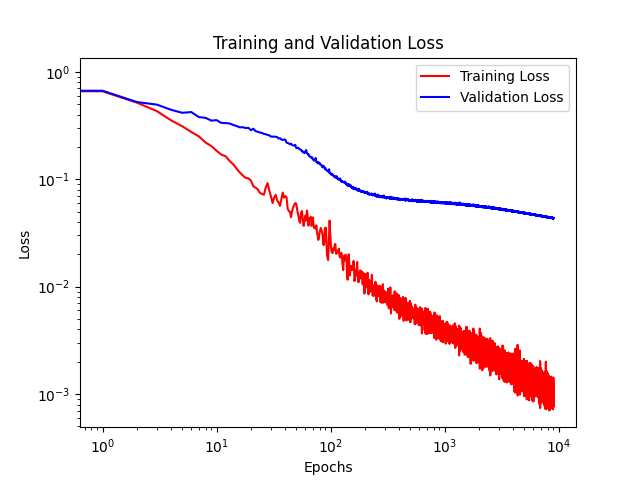

In [17]:
plt.figure()
plt.loglog(sqrt_loss, 'r', label='Training Loss')
plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels_bw)-1)


predict_bw = model.predict(testing_data_bw)

print(random_index)
print(predict_bw[random_index])
print(testing_labels_bw[random_index])

1673
[0.0001428]
0.0


In [64]:
print(testing_data_bw[638])
print(training_indices_bw[1673])


[0. 0. 0. ... 0. 0. 0.]
7501


In [65]:
model.save('model1.hdf5')